In [79]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
import talib as ta
import numpy as np

In [23]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## Load and explore stocks

In [24]:
stock = "AMZN"

In [27]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
# Here he use the download method but we could also just use the ticker
stock_hist = yf.download(f"{stock}", start=start_date, end=end_date, progress=False)

### Multiple visualisations of our dataset

In [31]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=stock_hist.index,
            open=stock_hist["Open"],
            high=stock_hist["High"],
            low=stock_hist["Low"],
            close=stock_hist["Close"],
        )
    ]
)
fig.update_layout(title=f"{stock} chart from {start_date} to {end_date}")

fig.show()

In [53]:
fig = px.line(
    stock_hist,
    x=stock_hist.index,
    y="Close",
    title=f"{stock} Analysis with Rangeslider",
)
fig.update_layout(xaxis_rangeslider_visible=True)

C:\Users\joses\AppData\Local\Temp\ipykernel_42948\2549533264.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



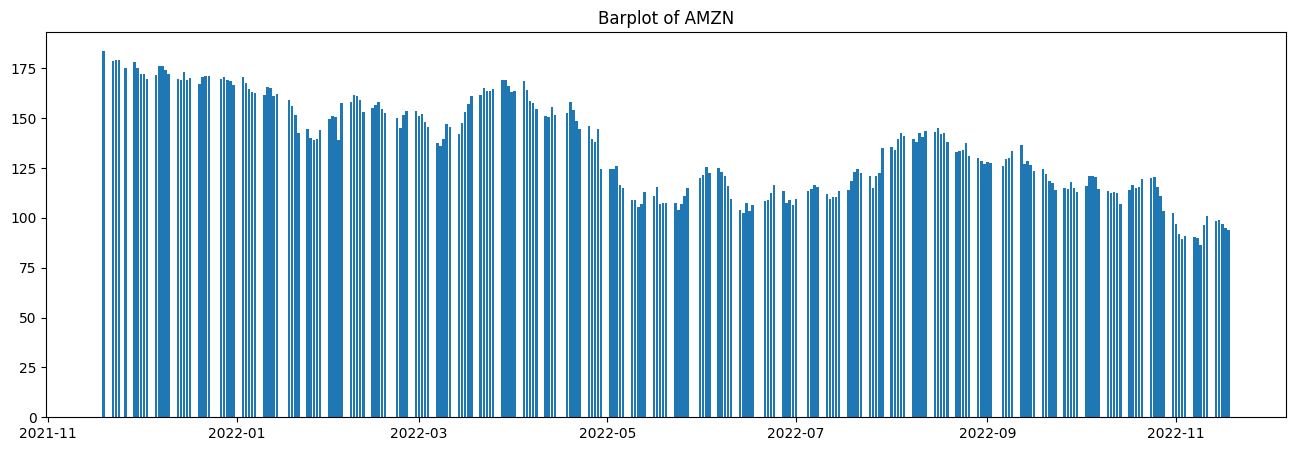

In [68]:
fig = plt.figure(figsize=(16, 5))
plt.bar(x=stock_hist.index, height=stock_hist["Close"])
plt.title(f"Barplot of {stock}")
fig.show()

#### Moving average

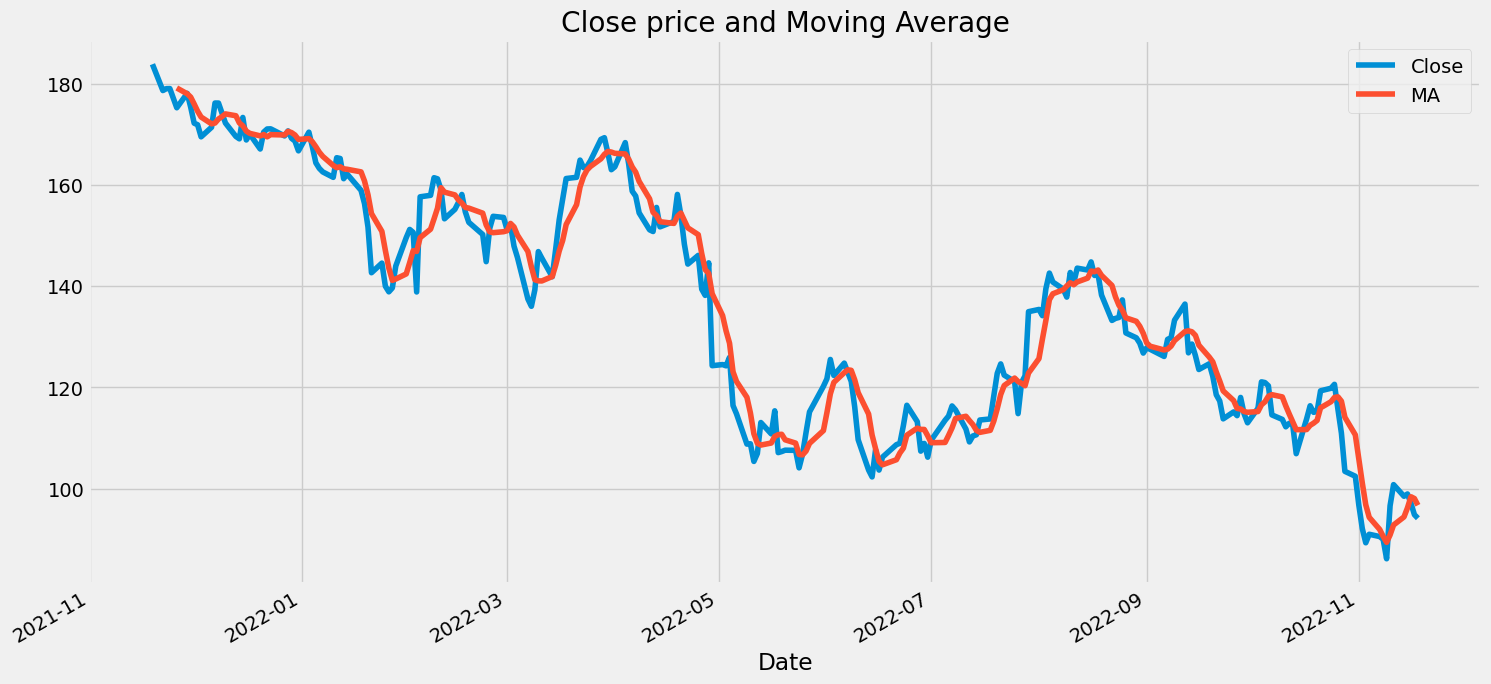

In [34]:
plt.style.use("fivethirtyeight")
stock_hist["MA"] = ta.SMA(stock_hist["Close"], timeperiod=5)
stock_hist[["Close", "MA"]].plot(
    figsize=(16, 8), title="Close price and Moving Average"
)
plt.show()

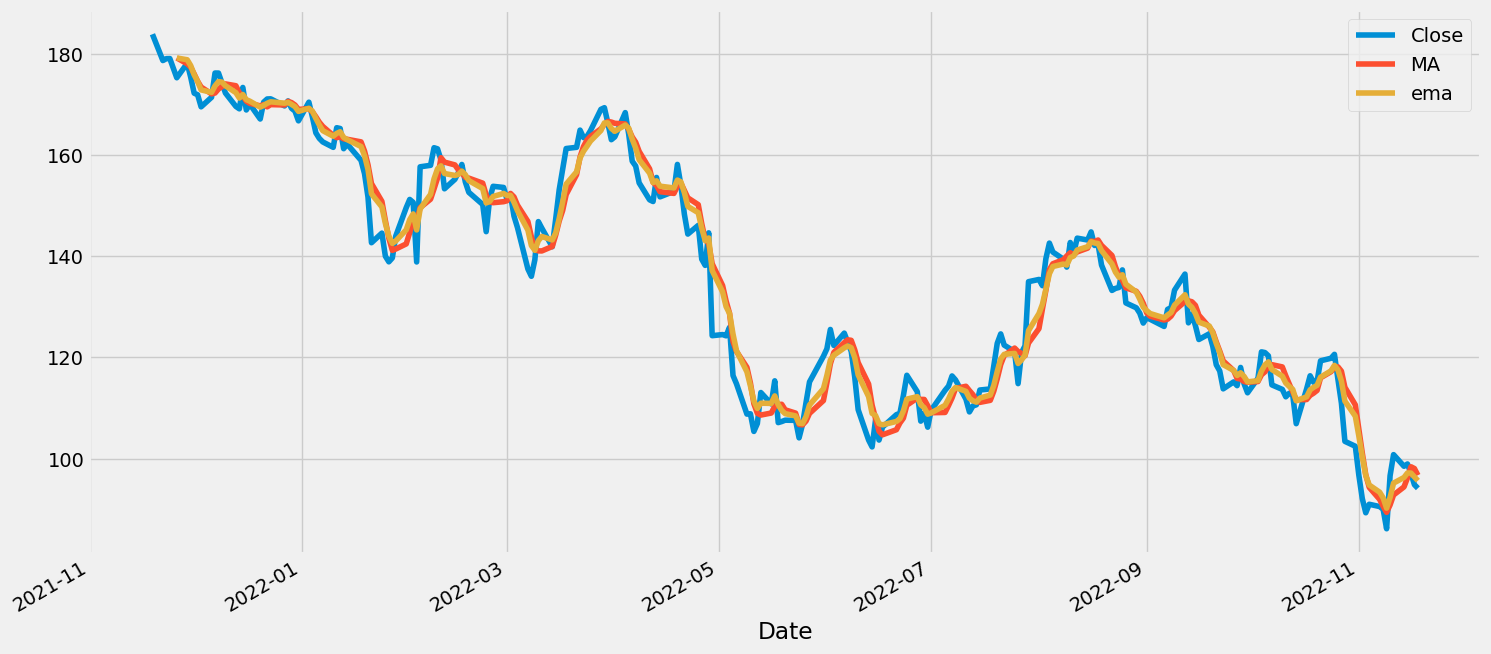

In [72]:
plt.style.use("fivethirtyeight")
stock_hist["ema"] = ta.EMA(stock_hist["Close"], timeperiod=5)
stock_hist[["Close", "MA", "ema"]].plot(figsize=(16, 8))
plt.show()

### RSI

What is Relative Strength Index(RSI)
RSI is a momentum indicator that helps to learn whether a certain share is overbought or oversold. Its value lies between 0-100. If it is under 30, it means it is oversold and has a chance to buy it. If the value lies above 70, it means it is overbought and it is a good chance to dump your stock. Let’s calculate and chart the RSI of the FB/Meta stock. Let’s check the RSI of FB.

In [35]:
stock_hist["RSI"] = ta.RSI(stock_hist["Close"])

<AxesSubplot: xlabel='Date'>

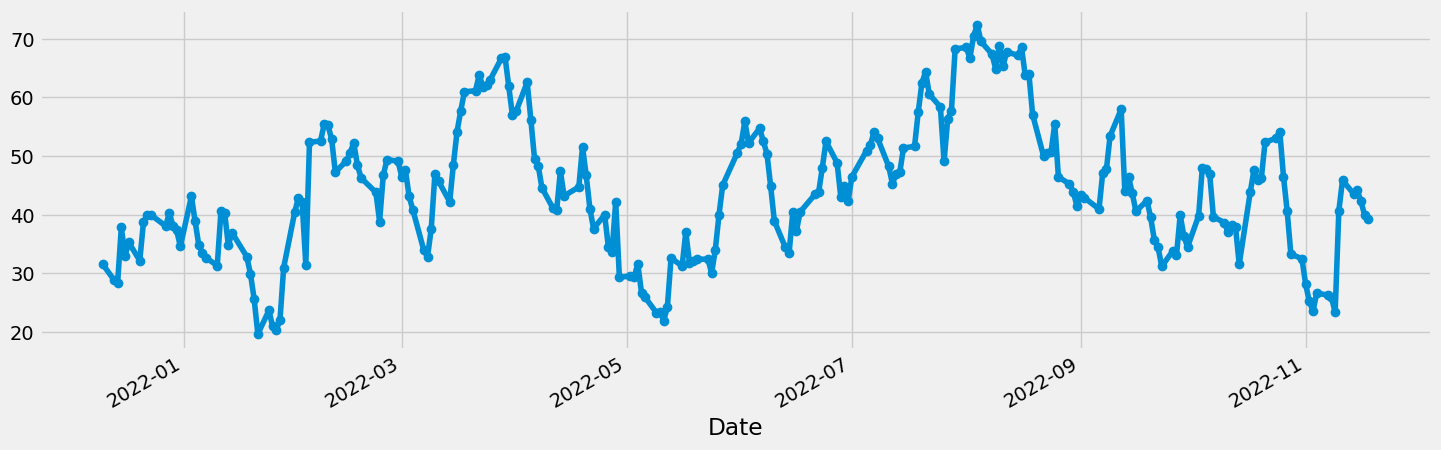

In [75]:
stock_hist["RSI"].plot(figsize=(16, 5), marker="o")

C:\Users\joses\AppData\Local\Temp\ipykernel_42948\1224362848.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



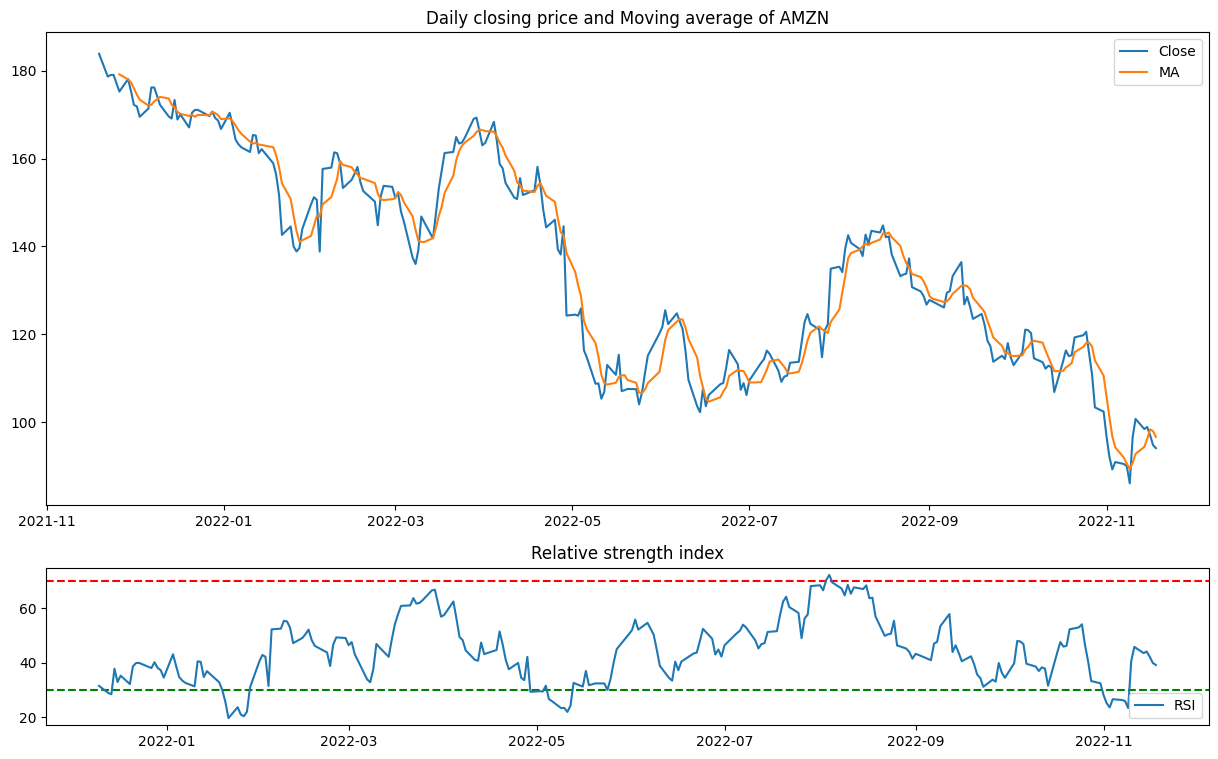

In [40]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(15, 9))
plt.style.use("default")
# axs[0].plot(stock_hist[['Close',"MA"]], label=["Close", "MA"])
axs[0].plot(stock_hist["Close"], label="Close")
axs[0].plot(stock_hist["MA"], label="MA")
axs[0].legend(loc="best")
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(stock_hist["RSI"], label="RSI")
axs[1].legend(loc="best")
axs[0].set_title(f"Daily closing price and Moving average of {stock}")
axs[1].set_title(f"Relative strength index")
fig.show()

In [47]:
timeperiod = 100
stock_hist["LinearReg"] = ta.LINEARREG(stock_hist["Close"], timeperiod=timeperiod)

C:\Users\joses\AppData\Local\Temp\ipykernel_42948\960621066.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



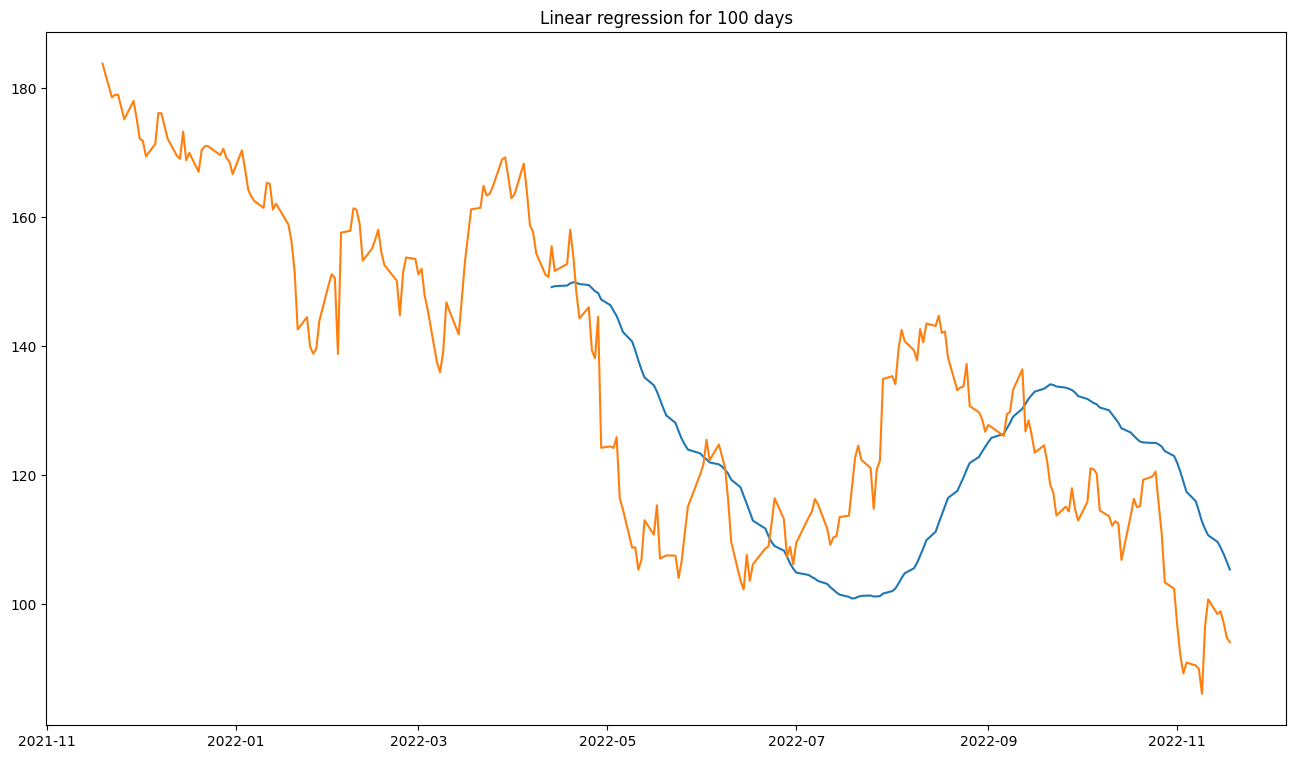

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(stock_hist["LinearReg"])
ax.plot(stock_hist["Close"])
ax.set_title(f"Linear regression for {timeperiod} days")
fig.show()

In [77]:
def bbp(price):
    up, mid, low = ta.BBANDS(
        stock_hist["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    bbp = (price["AdjClose"] - low) / (up - low)
    return bbp

In [80]:
holdings = pd.DataFrame(
    index=stock_hist.index, data={"Holdings": np.array([np.nan] * index.shape[0])}
)
holdings.loc[
    ((stock_hist["RSI"] < 30) & (stock_hist["BBP"] < 0)), "Holdings"
] = max_holding
holdings.loc[((stock_hist["RSI"] > 70) & (stock_hist["BBP"] > 1)), "Holdings"] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

NameError: name 'index' is not defined

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax0.plot(index, price['AdjClose'], label='AdjClose')
ax0.set_xlabel('Date')
ax0.set_ylabel('AdjClose')
ax0.grid()
for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='green')
    elif order < 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='red')

ax1.plot(index, price['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax2.plot(index, price['BB_up'], label='BB_up')
ax2.plot(index, price['AdjClose'], label='AdjClose')
ax2.plot(index, price['BB_low'], label='BB_low')
ax2.fill_between(index, y1=price['BB_low'], y2=price['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()